# Celebrity Image Classification

Thanks to codebasics for this guided project 
https://www.youtube.com/channel/UCh9nVJoWXmFb7sLApWGcLPQ

1.   Data Collection:

---


We want to use face images to classify using our model. We can do collection in following ways:

*   Web scraping
*   Download from public reposatories.

For this project, I am downloading a small dataset from here: https://github.com/codebasics/py/tree/master/DataScience/CelebrityFaceRecognition/images_dataset

2.  Cleaning Dataset

---


We are using a person's face to defferentiate, so we will be detecting a person's face in each photo using OpenCV. Next we will check for two eyes and discard all those images where two eyes are not properly visible or have more than 1 person (manually).

 1. Haar Cascade
 2. Manual Cleaning

 Reference:
 https://docs.opencv.org/master/d2/d99/tutorial_js_face_detection.html 
 https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php
 




In [2]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("test_images\sharapova1.jpg",cv2.IMREAD_COLOR) 
print(img.shape)

cv2.imshow('Image',img)
cv2.waitKey(0)  
cv2.destroyAllWindows()
img.dtype

(555, 700, 3)


dtype('uint8')

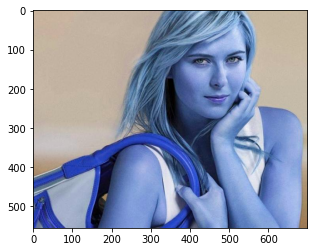

In [4]:
plt.imshow(img) 

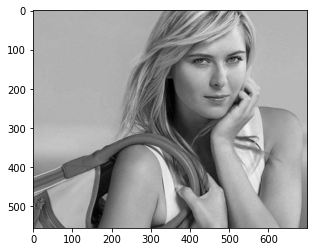

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape 
 
plt.imshow(gray, cmap='gray')

https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php


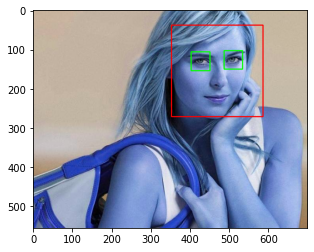

In [6]:
face_cascade =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray,1.3,5)

cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),2)
 
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


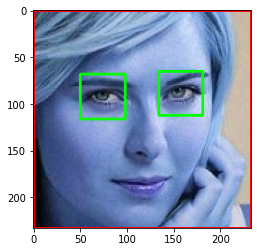

In [7]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [8]:
def get_cropped_image_if_2_eyes(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
        

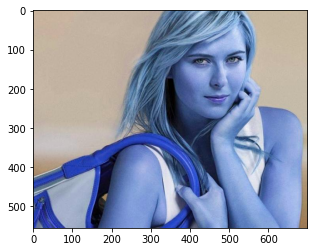

In [9]:
original_image = cv2.imread("test_images\sharapova1.jpg",cv2.IMREAD_COLOR) 
plt.imshow(original_image)

In [10]:
cropped_img = get_cropped_image_if_2_eyes("test_images\sharapova2.jpg")
if cropped_img is not None:
    plt.imshow(cropped_img)

Saving cropped images in cropped folder of respective celebrities

In [11]:
path_to_data = 'dataset'
path_to_cropped_data = 'dataset\cropped'

In [12]:
import os 
image_dirs=[]

for entry in os.scandir(path_to_data):
    if entry.is_dir:
        image_dirs.append(entry.path)

print(image_dirs)

['dataset\\lionel_messi', 'dataset\\maria_sharapova', 'dataset\\roger_federer', 'dataset\\serena_williams', 'dataset\\virat_kohli']


In [13]:
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
    
os.mkdir(path_to_cropped_data)

In [14]:
count = 0
cropped_image_dirs = []
celebrity_file_names = {}

for img_dir in image_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    
    celebrity_file_names[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cropped_data,celebrity_name)

            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Creating cropped folder for - ",celebrity_name)
                
            cropped_file_name = celebrity_name + str(count) + '.jpg'
            cropped_file_path = os.path.join(cropped_folder,cropped_file_name)
            
            cv2.imwrite(cropped_file_path,roi_color)
            count += 1
            
            celebrity_file_names[celebrity_name].append(cropped_file_path)            

Creating cropped folder for -  lionel_messi
Creating cropped folder for -  maria_sharapova
Creating cropped folder for -  roger_federer
Creating cropped folder for -  serena_williams
Creating cropped folder for -  virat_kohli


In [15]:
cropped_image_dirs

['dataset\\cropped\\lionel_messi',
 'dataset\\cropped\\maria_sharapova',
 'dataset\\cropped\\roger_federer',
 'dataset\\cropped\\serena_williams',
 'dataset\\cropped\\virat_kohli']

In [16]:
#This dictionary contains path to all the images. Key is the celebrity name. It also contains paths to images
#which have been manually deleted
celebrity_file_names;

Now we have cropped folder under dataset folder.
Next, manually delete irrelevant images. 
After manual cleaning update 'celebrity_file_name' dictionary

In [21]:
celebrity_file_names_dict = {}
for entry in os.scandir(path_to_cropped_data):
    celebrity_file_names_dict[entry.name] = []
    for cr_image_path in os.scandir(entry.path):
        celebrity_file_names_dict[entry.name].append(cr_image_path.path)
        
celebrity_file_names_dict;
    

3. Feature Engineering using Wavelet Transform

---

Extract important features of the face using wavelet transform. We can clearly spot the edges and get clue on various facial features like nose, eyes etc. To make the training data, stack cropped image with wavelet transform of the image 

Reference: https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html
https://stackoverflow.com/questions/24536552/how-to-combine-pywavelet-and-opencv-for-image-processing



In [22]:
#Multi level 2D Discrete Wavelet Transform

import numpy as np 
import pywt 

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float 
    #Image is in discreet uint8, for WVT continuous real values required
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

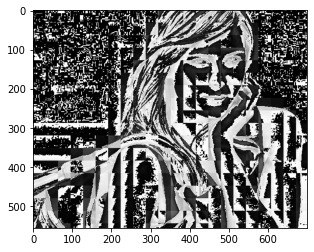

In [20]:
img = cv2.imread("test_images\sharapova1.jpg",cv2.IMREAD_COLOR)
wvt_img = w2d(img,'db1',5)
plt.imshow(wvt_img, cmap = 'gray')

In [16]:
print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


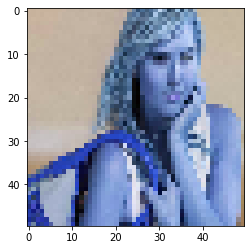

In [28]:
# resize image to c columns and r rows (50 here) 
scaled_img = cv2.resize(img,(50,50))
plt.imshow(scaled_img)

In [23]:
count = 0
class_dict = {}
for keys in celebrity_file_names_dict:
    class_dict[keys]=count 
    count += 1
    
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [24]:
X=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_file in training_files:
        img = cv2.imread(training_file)
        
        scaled_img = cv2.resize(img,(32,32))
        wvt_img = w2d(img, 'db1', 5)
        scaled_wvt_img = cv2.resize(wvt_img,(32,32))
        combined_img = np.vstack(((scaled_img.reshape(32*32*3,1)), (scaled_wvt_img.reshape(32*32,1))))
            
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        

In [25]:
print(len(X))
len(y)

162


162

In [26]:
print(len(X[0]))
print(32*32*3 + 32*32)

4096
4096


In [28]:
X;

In [29]:
y;

In [35]:
#Each row represents 1 image from the training set 
#X in a list data structure. 
#Need to convert to numpy array
# .astype() is to convery numpy array to specified dtype
print(np.array(X).shape)
X = np.array(X).reshape(len(X),len(X[0])).astype(float)
print(X.shape)

(162, 4096, 1)
(162, 4096)


4. Training Model for Classification 

---

    1. Split data into training and testing
    2. Build pipleline for model
        i.   Preprocessing Step: Scale data. Since no missing value, imputation not required. SVM algorithms are not scale  invariant, so the data needs to be scaled.
        ii.  Define the model: SVM classifier
        iii. Create pipeline
        iv.  Evaluate pipeline
    3. Hyperparameter tuning using GridSearchCV


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)
print(X_train.shape,X_test.shape)

(113, 4096) (49, 4096)


In [37]:
#make_pipeline is a shorthand for pipeline constructor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

my_pipeline = make_pipeline(StandardScaler(),SVC(C=10,kernel='rbf',gamma='auto'))
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

In [38]:
#.score() gives mean accuracy for predicts made on X_test
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = my_pipeline.predict(X_test)
print('accuracy_score: ',accuracy_score(y_test,y_pred))
print('score: ',my_pipeline.score(X_test,y_test))

target_name = [key for key in class_dict.keys()]
print('\n',classification_report(y_test,y_pred,target_names=target_name))

accuracy_score:  0.8163265306122449
score:  0.8163265306122449

                  precision    recall  f1-score   support

   lionel_messi       1.00      0.78      0.88         9
maria_sharapova       0.92      1.00      0.96        12
  roger_federer       0.45      1.00      0.62         5
serena_williams       1.00      0.44      0.62         9
    virat_kohli       0.86      0.86      0.86        14

       accuracy                           0.82        49
      macro avg       0.85      0.82      0.79        49
   weighted avg       0.88      0.82      0.82        49



In [74]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model_params = {
    'svm':{
        'model':SVC(gamma = 'auto', probability = True),
        'params':{
           'svc__C':[1, 3, 10, 30, 100, 1000],
           'svc__kernel':['rbf', 'linear', 'poly'],
           'svc__degree':[3,4]
        }
    },
    
    'RandomForest':{
        'model':RandomForestClassifier(),
    'params':{
        'randomforestclassifier__n_estimators':[100, 200, 500]
        }  
    },
    
    'LogisticRegression':{
        'model':LogisticRegression(solver='liblinear', multi_class='auto'), 
        'params':{
            'logisticregression__C':[1,3,10,30]
        }
    }                          
        
}

In [72]:
for key,value in model_params.items():
    print(model_params[key]['params'])

{'C': [1, 3, 10, 30, 100, 1000], 'kernel': ['rbf', 'linear', 'poly'], 'degree': [3, 4]}
{'n_estimators': [100, 200, 500]}
{'C': [1, 3, 10, 30]}


In [75]:
from sklearn.model_selection import GridSearchCV

scores = []
best_model={}

for key,value in model_params.items():
    
    pipe = make_pipeline(StandardScaler(), value['model'])
    clf = GridSearchCV(pipe, value['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    
    scores.append({
        'model':key,
        'best_score':clf.best_score_,
        'best_param':clf.best_params_
    })
    
    best_model[key] = clf.best_estimator_

In [77]:
import pandas as pd

df  = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df

,model,best_score,best_param
0,svm,0.831225,"{'svc__C': 1, 'svc__degree': 3, 'svc__kernel':..."
1,RandomForest,0.830830,{'randomforestclassifier__n_estimators': 500}
2,LogisticRegression,0.875494,{'logisticregression__C': 1}


In [80]:
best_model

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=500))]),
 'LogisticRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [81]:
best_model['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [82]:
best_model['svm'].score(X_test,y_test)

0.9183673469387755

In [85]:
best_model['LogisticRegression'].score(X_test,y_test)

0.8775510204081632

In [86]:
best_clf = best_model['svm']

In [87]:
from sklearn.metrics import confusion_matrix

y_pred = best_clf.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 9,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  1,  2,  6,  0],
       [ 0,  1,  0,  0, 13]], dtype=int64)

Text(50.09374999999999, 0.5, 'Truth')

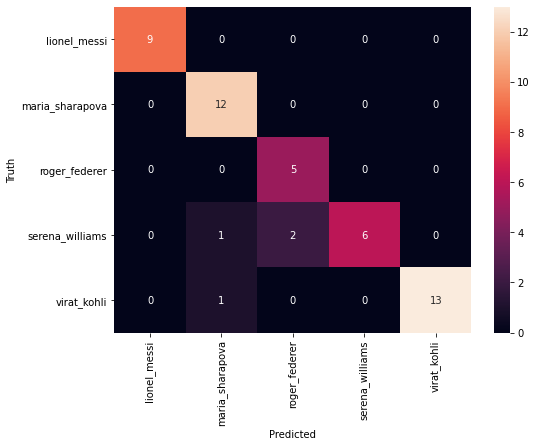

In [106]:
import seaborn as sns

yticklabels = [key for key in class_dict.keys()]
plt.figure(figsize=(8,6))
sns.heatmap(cfm, yticklabels=yticklabels, xticklabels=yticklabels, annot=True, cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Save trained model as a pickle in a file

In [108]:
import joblib
joblib.dump(best_clf, 'final_classifier.pkl')

['final_classifier.pkl']

Save the class dictionary

In [111]:
import json

out_file = open('class_dictionary.json','w')
json.dump(class_dict, out_file, indent=6)